In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
df = pd.read_csv('data/csv/user_data.csv') 
df.columns

Index(['id', 'age', 'gender', 'race_ethnicity', 'socio_economic_status',
       'urban_rural', 'parental_involvement', 'hobbies', 'Openness',
       'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism',
       'average_positive_probability_before', 'count_id_before',
       'average_positive_probability_after', 'count_id_after', 'diff',
       'mental_health_score_before', 'mental_health_score_after',
       'score_change', 'gratitude', 'journals', 'sunny', 'cloudy', 'rainy',
       'snowy', 'windy', 'exercise', 'movie_tv', 'gaming', 'reading',
       'instrument', 'walk', 'music', 'drawing', 'class', 'study', 'homework',
       'exam', 'sleep'],
      dtype='object')

In [160]:
removed_cols = ['id', 'hobbies', 'average_positive_probability_before', 
                'average_positive_probability_after', 'diff','score_change', 
                'count_id_after','count_id_before','urban_rural','race_ethnicity']
df = df.drop(columns=removed_cols)
df.shape

(300, 31)

In [161]:
X = df.drop(columns=['mental_health_score_after'])
y = df['mental_health_score_after']

In [162]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

categorical_columns = ['gender', 'socio_economic_status', 'parental_involvement', 'Openness',
       'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
numerical_columns = X.columns.difference(categorical_columns)

In [163]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

In [164]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'class', 'cloudy', 'drawing', 'exam', 'exercise', 'gaming',
       'gratitude', 'homework', 'instrument', 'journals',
       'mental_health_score_before', 'movie_tv', 'music', 'rainy', 'reading',
       'sleep', 'snowy', 'study', 'sunny', 'walk', 'windy'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender',
                                                   'socio_economic_status',
                                                   'parental_involvement',
                                                   'Openness',
                                                   'Conscientiousness',
                                                   'Extraversion',
                                                   'Agreeableness',
                                                   'Neuroticism'])])),
                ('regressor', LinearRegression())])

In [123]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 164.97426766719158
R^2 Score: 0.7271820708514316


In [124]:
preprocessor = pipeline.named_steps['preprocessor']
regressor = pipeline.named_steps['regressor']

In [125]:
# Get the feature names after one-hot encoding
encoded_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)

# Combine numerical and encoded categorical feature names
feature_names = numerical_columns.tolist() + encoded_feature_names.tolist()

# Get the coefficients
coefficients = regressor.coef_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("\nCoefficients of the regression model:")
print(coef_df.sort_values(by='Coefficient', ascending=False))


Coefficients of the regression model:
                         Feature  Coefficient
11    mental_health_score_before    14.532786
13                         music     5.443241
5                       exercise     4.522331
7                      gratitude     2.497839
19                         sunny     1.700541
10                      journals     1.149088
3                        drawing     0.988898
17                         snowy     0.666298
8                       homework     0.612783
18                         study     0.485166
9                     instrument     0.295159
29                Extraversion_1     0.292555
12                      movie_tv     0.247853
2                         cloudy     0.144978
15                       reading    -0.004744
23  socio_economic_status_middle    -0.047342
1                          class    -0.193063
16                         sleep    -0.229883
22                   gender_male    -0.250907
24   socio_economic_status_upper    -0.36

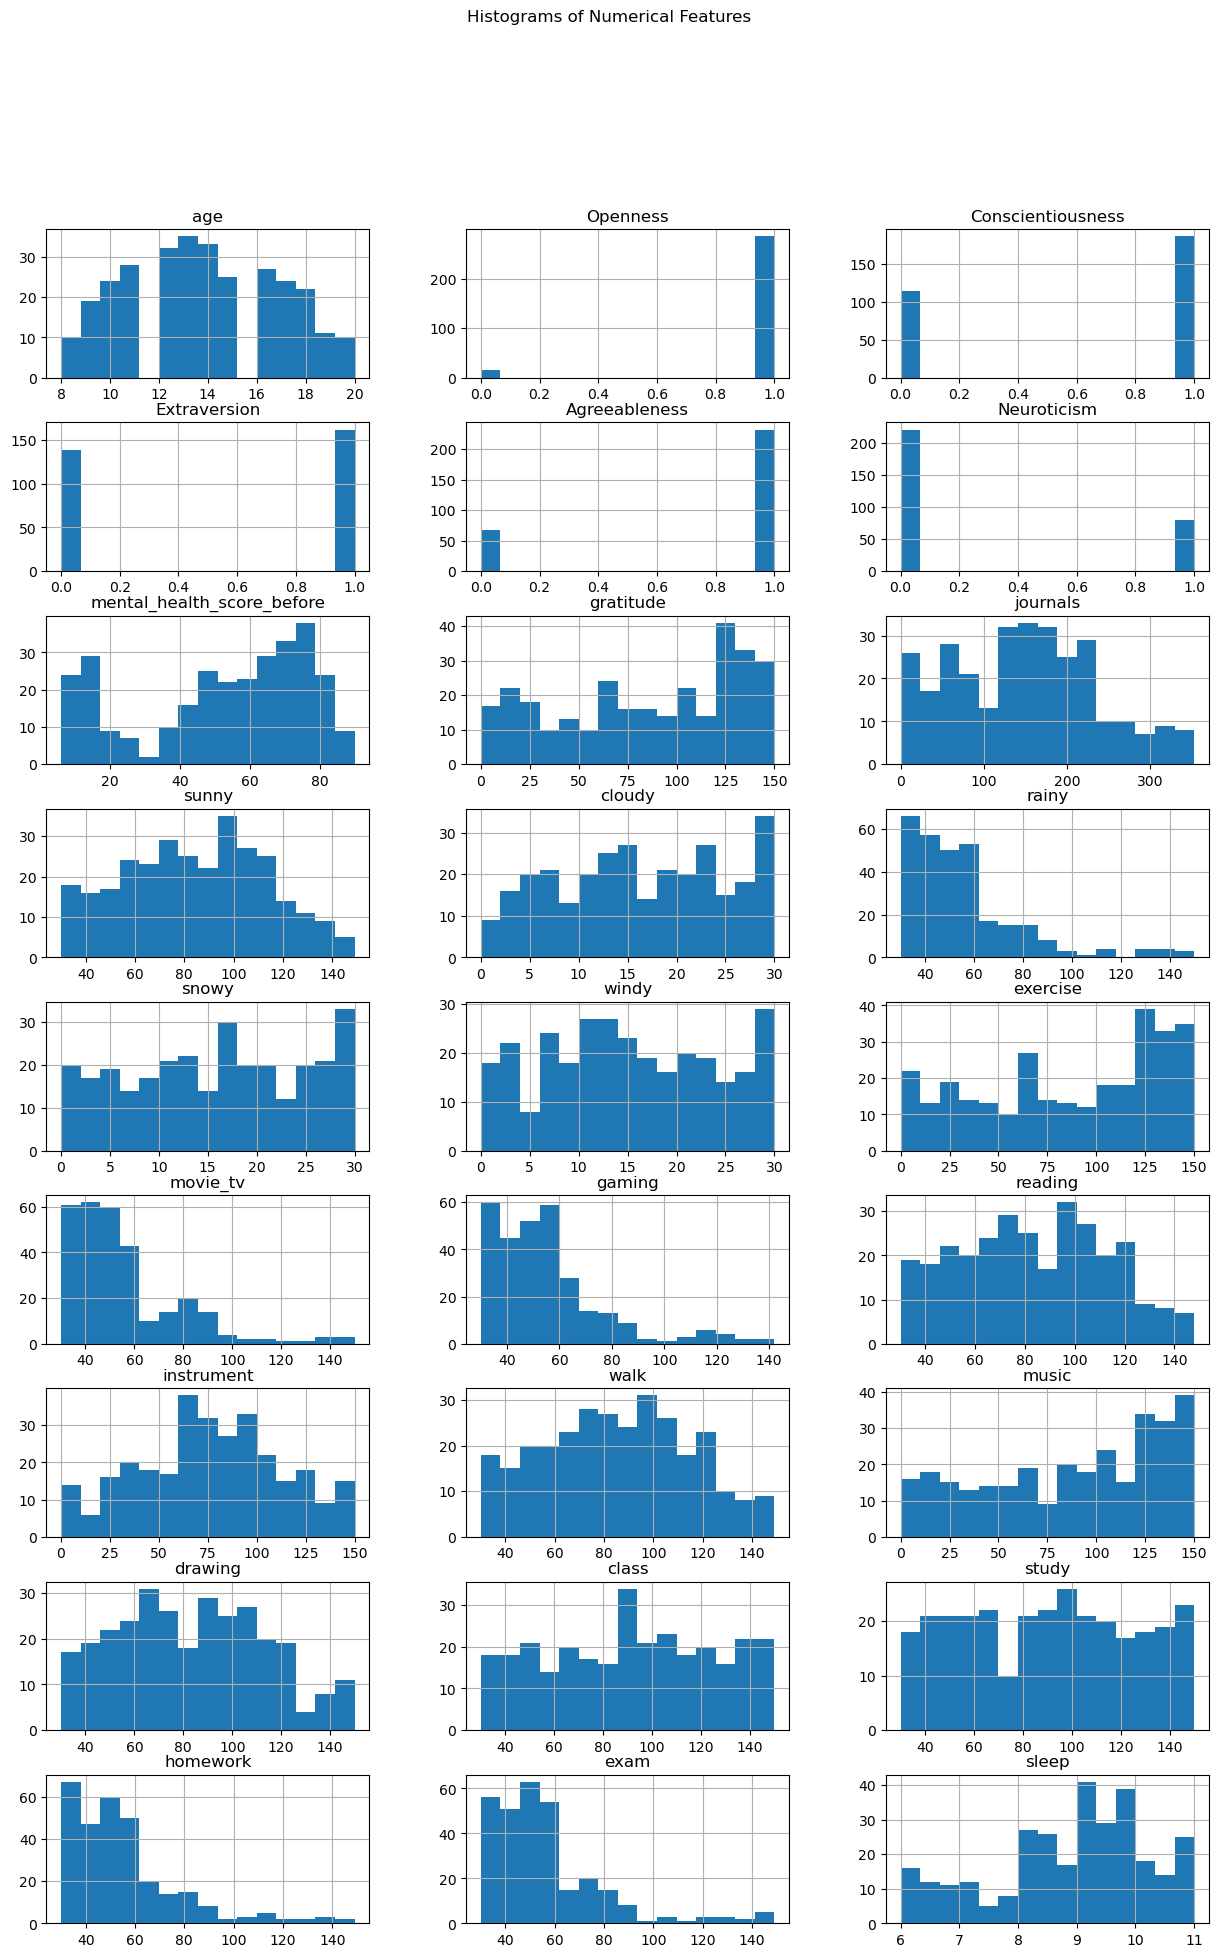

In [130]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
numerical_columns = X.select_dtypes(include=['number']).columns

X[numerical_columns].hist(bins=15, figsize=(15, 22), layout=(9, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

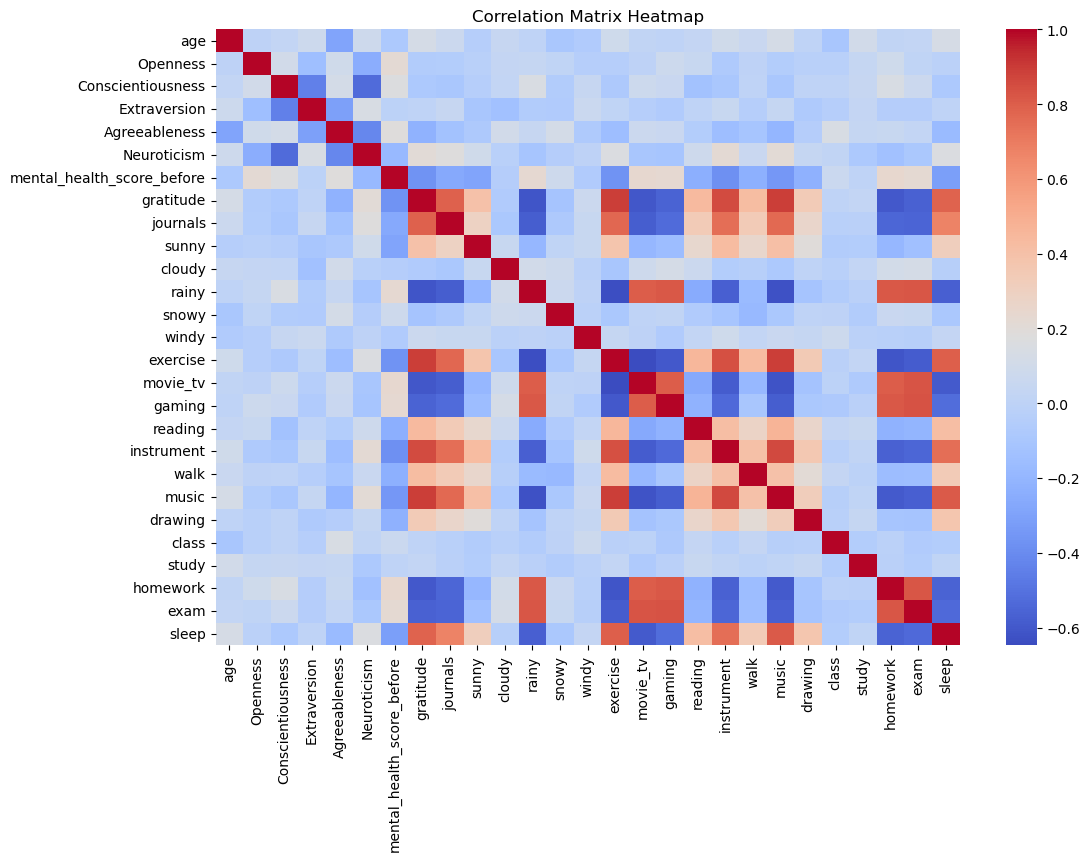

In [134]:
import seaborn as sns

# Compute the correlation matrix

corr = X[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

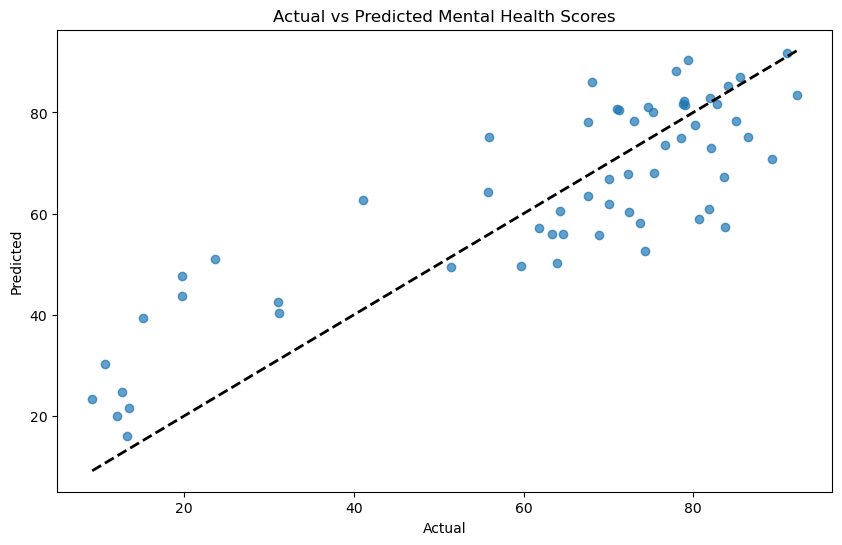

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Mental Health Scores')
plt.show()

<Figure size 1200x800 with 0 Axes>

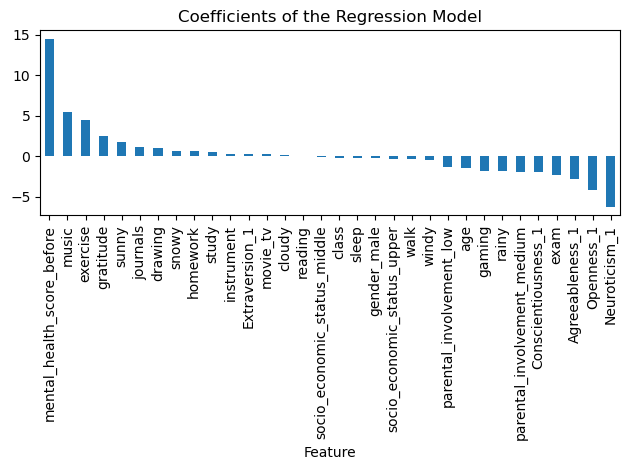

In [136]:
plt.figure(figsize=(12, 8))
coef_df.sort_values(by='Coefficient', ascending=False).plot(kind='bar', x='Feature', y='Coefficient', legend=False)
plt.title('Coefficients of the Regression Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


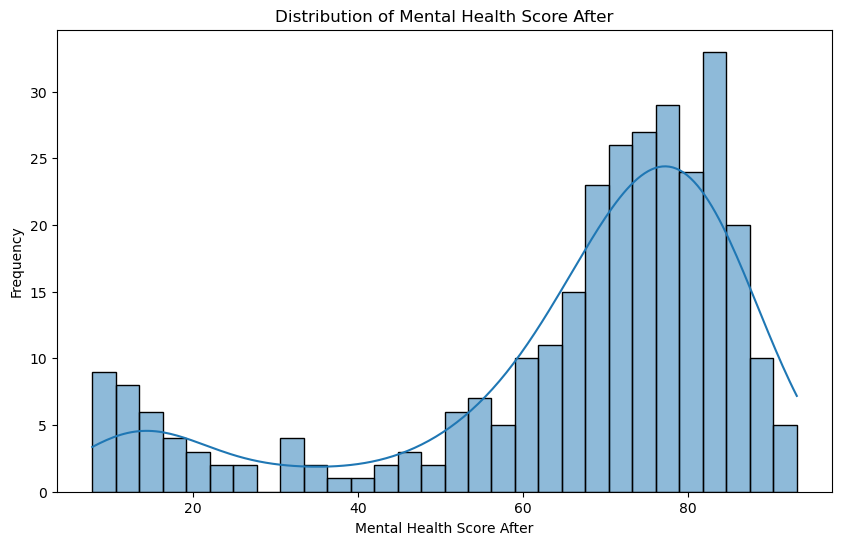

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Mental Health Score After')
plt.xlabel('Mental Health Score After')
plt.ylabel('Frequency')
plt.show()

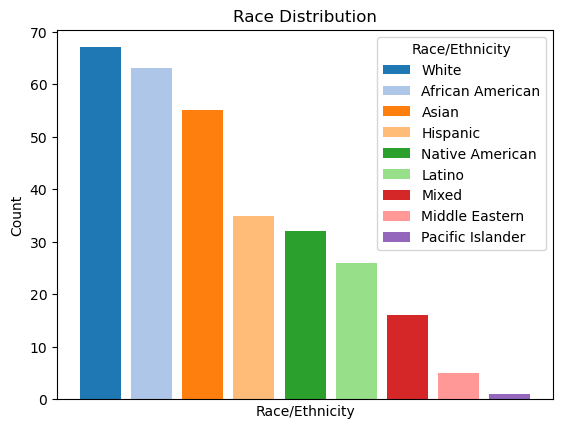

In [147]:
df = pd.read_csv(''data/csv/user_data.csv'') 
df.columns
race_counts = df['race_ethnicity'].value_counts()

colors = plt.cm.tab20.colors[:len(race_counts)]

fig, ax = plt.subplots()
bars = ax.bar(race_counts.index, race_counts.values, color=colors)

ax.set_xticks([])

ax.set_title('Race Distribution')
ax.set_xlabel('Race/Ethnicity')
ax.set_ylabel('Count')

ax.legend(bars, race_counts.index, title='Race/Ethnicity')

plt.show()

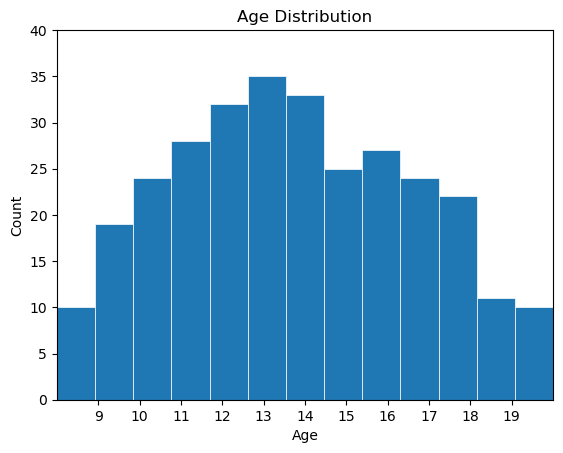

In [143]:
fig, ax = plt.subplots()

ax.hist(df['age'], bins=13, linewidth=0.5, edgecolor="white")

ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

ax.set(xlim=(8, 20), xticks=np.arange(9, 20),
       ylim=(0, 40), yticks=np.linspace(0, 40, 9))

plt.show()

In [148]:
color_map = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'salmon', 4: 'red'}

# Assign color based on mental_health_score_before
df['color'] = df['mental_health_score_before'].apply(lambda x: color_map.get(int(x), 'gray'))


In [149]:
df

,id,age,gender,race_ethnicity,socio_economic_status,urban_rural,parental_involvement,hobbies,Openness,Conscientiousness,...,instrument,walk,music,drawing,class,study,homework,exam,sleep,color
0,1,15,male,Asian,middle,urban,medium,"basketball,videogames,coding",1,0,...,43,41,5,69,38,48,60,68,6.7,gray
1,2,13,female,Latino,lower,rural,high,"reading,painting,volleyball",0,1,...,17,85,24,43,71,53,63,75,6.1,gray
2,3,10,male,African American,middle,urban,medium,"soccer,drawing,playingguitar",1,0,...,122,141,143,118,141,34,52,32,10.5,gray
3,4,17,female,White,upper,urban,high,"ballet,photography,volunteering",1,1,...,54,52,37,71,85,90,75,65,6.5,gray
4,5,12,male,Hispanic,lower,rural,low,"videogames,skateboarding,drawing",0,0,...,77,87,108,65,43,55,35,59,8.9,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,17,female,African American,middle,urban,high,"writing,ballet,volunteering",1,1,...,111,129,147,108,99,48,33,50,9.2,gray
296,297,13,male,Mixed,lower,urban,low,"basketball,coding,playingguitar",0,0,...,143,143,121,141,147,127,43,54,9.9,gray
297,298,18,female,Native American,middle,rural,medium,"hiking,reading,photography",1,1,...,102,105,121,138,102,113,56,36,10.4,gray
298,299,8,male,White,upper,urban,high,"Legobuilding,soccer,reading",0,0,...,97,124,127,79,89,94,32,37,10.3,gray


C:\Users\AppData\Local\Temp\ipykernel_17672\1878606543.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby('score_bin')['age'].value_counts().unstack(fill_value=0)


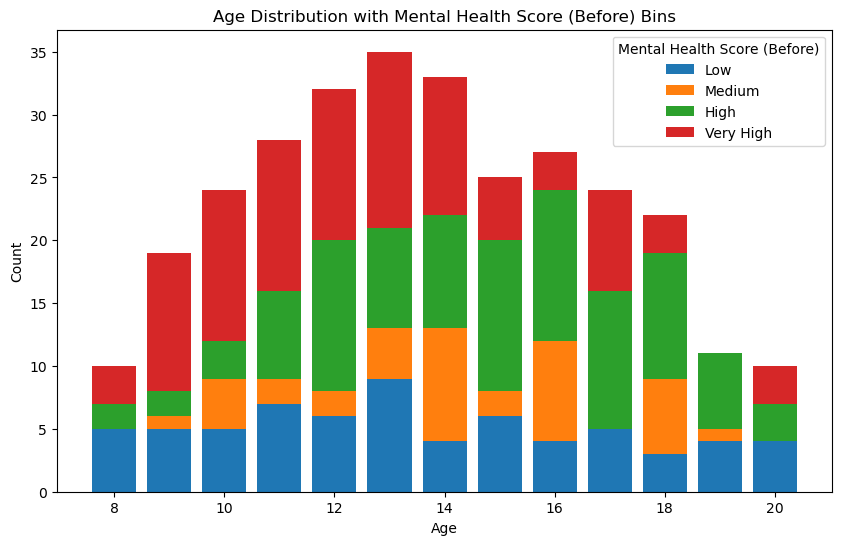

In [155]:
# Define bins for mental_health_score_before
bins = np.linspace(df['mental_health_score_before'].min(), df['mental_health_score_before'].max(), 5)

# Assign bin labels
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Cut mental_health_score_before into bins
df['score_bin'] = pd.cut(df['mental_health_score_before'], bins=bins, labels=bin_labels, include_lowest=True)

# Calculate age distribution for each score_bin
age_counts = df.groupby('score_bin')['age'].value_counts().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(age_counts.columns))
for i, label in enumerate(bin_labels):
    plt.bar(age_counts.columns, age_counts.loc[label], label=label, bottom=bottom)
    bottom += age_counts.loc[label]

plt.title('Age Distribution with Mental Health Score (Before) Bins')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mental Health Score (Before)', loc='upper right')
plt.show()

### Ridge Regression

In [167]:
from sklearn.linear_model import Ridge
df = pd.read_csv(''data/csv/user_data.csv'') 
df.columns
removed_cols = ['id', 'hobbies', 'average_positive_probability_before', 
                'average_positive_probability_after', 'diff','score_change', 
                'count_id_after','count_id_before','urban_rural','race_ethnicity']
df = df.drop(columns=removed_cols)
df.shape
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
df = df.fillna(df.mean())  # Impute missing values with mean

# Define categorical columns
categorical_columns = ['gender', 'socio_economic_status', 'parental_involvement', 'Openness',
                       'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['mental_health_score_after'])
y = df['mental_health_score_after']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge:.2f}')

Ridge Regression MSE: 164.05
